In [2]:
import matplotlib.pyplot as plt
import numpy as np

from histograms import PairDens, run_simulation, g_theoretical
from concurrent.futures import ProcessPoolExecutor
#%load_ext autoreload
#%autoreload 2

## For different values of U_tot:

In [13]:
Utot_list = [0.0, 0.1, 0.5, 2.5]
gamma_list = [-2.82*10**(-15), 0.0264, 0.506, 2.43]

Utot_gamma_pairs = list(zip(Utot_list, gamma_list))

n = 200000 # Starting plankton population size.
iters = 1000 # Time steps.
L_max = np.sqrt(10) # Size of square domain.
area = L_max**2
delta = 10**(-7)
pow_min = -8.0 # To reproduce the image, choose -8.0
pow_max = -1.5 # To reproduce the image, choose -1.5
dp = 0.25

def simulation_for_Utot(U_tot_gamma):
    U_tot, gamma = U_tot_gamma
    plankton = run_simulation(n, iters, L_max, delta, U_tot, True)
    print(f"Number of plankton after the simulation for {U_tot}: {len(plankton)}.")
    
    edges, pcf_dx, pcf_dp = PairDens(pow_min, pow_max, dp, L_max, plankton)

    radii = [i / delta for i in edges]

    C_0 = len(plankton) / area

    g_test = g_theoretical(gamma, radii, C_0, iters)
    
    return radii, pcf_dx, pcf_dp, g_test

with ProcessPoolExecutor() as executor:
    results = list(executor.map(simulation_for_Utot, Utot_gamma_pairs))
    np.save("results_histograms.npy", results)

Number of plankton after the simulation: 2608.
Number of plankton after the simulation: 4678.
Number of plankton after the simulation: 1862.
Number of plankton after the simulation: 1434.


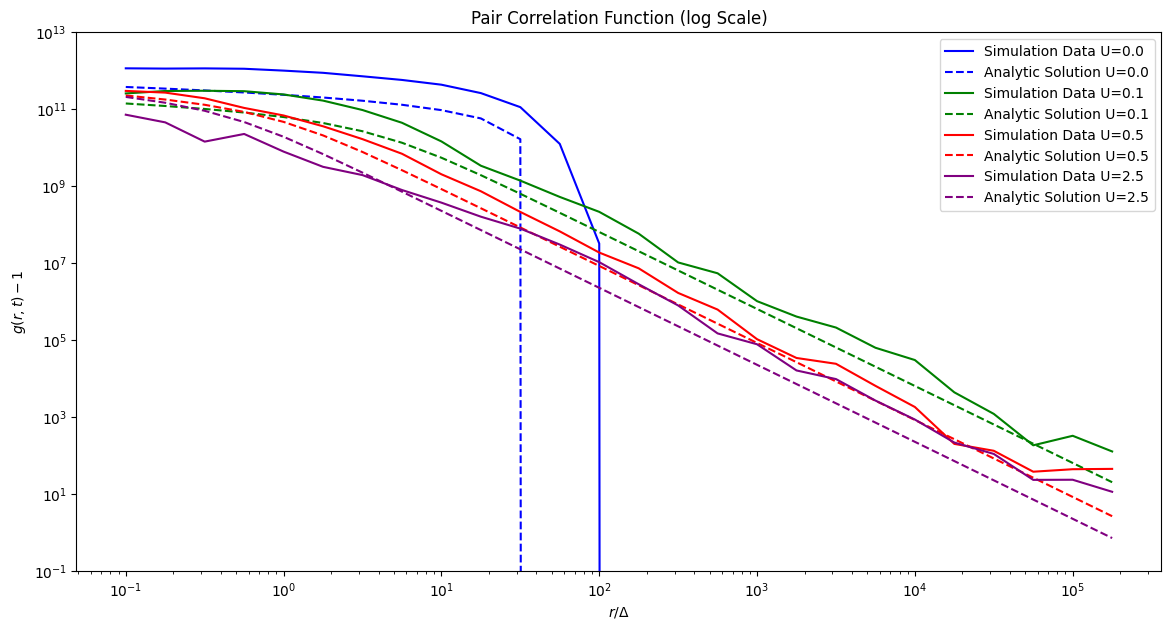

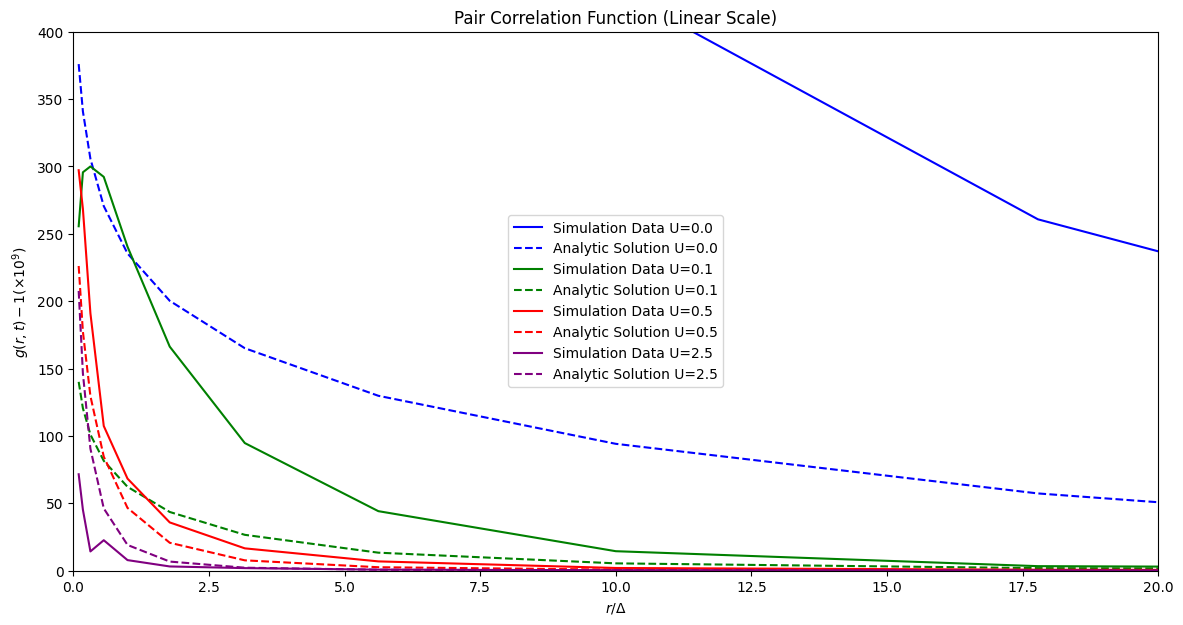

In [19]:
colours = ['black', 'blue', 'red', 'green']

plt.figure(figsize=(14, 7))
for i, (radii, pcf_dx, pcf_dp, exact_sol) in enumerate(results):
    colour = colours[i % len(colours)]
    radii = np.array(radii)
    pcf_dx = np.array(pcf_dx)
    exact_sol = np.array(exact_sol)
    plt.loglog(radii, pcf_dx - 1, color=colour, label=f'Simulation Data U={Utot_list[i % len(colours)]}')
    plt.loglog(radii, exact_sol, '--', color=colour, label=f'Analytic Solution U={Utot_list[i % len(colours)]}')
plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1$')
plt.ylim(10**(-1), 10**13)
plt.title('Pair Correlation Function (log Scale)')
plt.legend()
plt.show()


plt.figure(figsize=(14, 7))
for i, (radii, pcf_dx, pcf_dp, exact_sol) in enumerate(results):
    colour = colours[i % len(colours)]
    radii = np.array(radii)
    pcf_dx = (np.array(pcf_dx) - 1) / 10**9
    exact_sol = np.array(exact_sol) / 10**9
    plt.plot(radii, pcf_dx , color = colour, label=f'Simulation Data U={Utot_list[i % len(colours)]}')
    plt.plot(radii, exact_sol, '--', color = colour, label=f'Analytic Solution U={Utot_list[i % len(colours)]}')
plt.xlim(0, 20)
plt.ylim(0, 400)
plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1 (\times 10^{9})$')
plt.title('Pair Correlation Function (Linear Scale)')
plt.legend()
plt.show()

## Testing the analytical solution for $n=200000$:

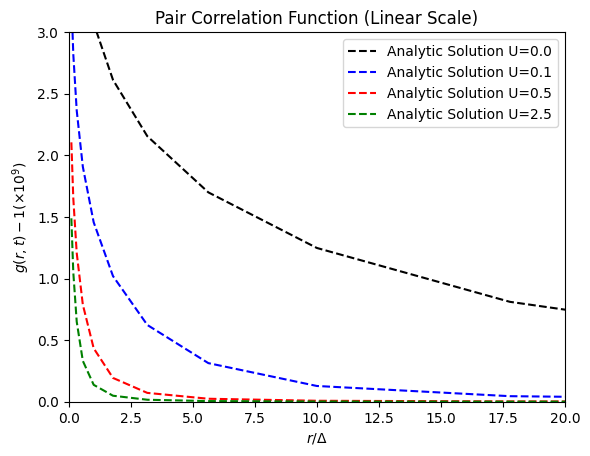

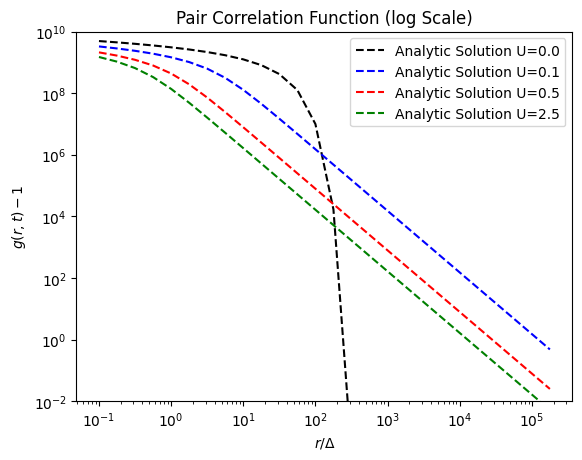

In [20]:
n = 200000
iters = 1000 # Time steps.
L_max = np.sqrt(10) # Size of square domain.
area = L_max**2
delta = 10**(-7)
pow_min = -8.0 # To reproduce the image, choose -8.0
pow_max = -1.5 # To reproduce the image, choose -1.5
dp = 0.25
edges = 10 ** np.arange(pow_min, pow_max + dp, dp)
Utot_list = [0.0, 0.1, 0.5, 2.5]
gamma_list = [-2.82*10**(-15), 0.0264, 0.506, 2.43]

colours = ['black', 'blue', 'red', 'green']

radii = [i / delta for i in edges[:-1]]
C_0 = n / area

for i, gamma in enumerate(gamma_list):
    colour = colours[i % len(colours)]
    exact = g_theoretical(gamma, radii, C_0, iters) / 10**9
    plt.plot(radii, exact, '--', color = colour, label=f'Analytic Solution U={Utot_list[i % len(colours)]}')
plt.xlim(0, 20)
plt.ylim(0, 3)
plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1 (\times 10^{9})$')
plt.title('Pair Correlation Function (Linear Scale)')
plt.legend()
plt.show()


for i, gamma in enumerate(gamma_list):
    colour = colours[i % len(colours)]
    exact = g_theoretical(gamma, radii, C_0, iters)
    plt.loglog(radii, exact, '--', color=colour, label=f'Analytic Solution U={Utot_list[i % len(colours)]}')
plt.ylim(10**(-2), 10**10)
plt.xlabel(r'$r / \Delta$')
plt.ylabel(r'$g(r, t) - 1$')
plt.title('Pair Correlation Function (log Scale)')
plt.legend()
plt.show()